# SVM
Suport Vector Machine work separing the data with hyperplanes (lines), we said hyperplanes because you can separate the N-dimensional data, with a simple line

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error

## Dataset

Explanation of the features:
1. Avg. Session Length: mean of the session per user, in minutes
2. Time on App: the mean of all sessions in app, in minutes
3. Time on Website: the mean of all sessions in website, in minutes
4. Length of Membership: the length of membership, in years
5. Yearly Amount Spent: the money spend last year, in euros

In [77]:
df_customer = pd.read_csv('C:/Users/alberto.rubiales/PycharmProjects/Pycharm/SVM/Ecommerce Customers.csv')
df_customer.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)

In [78]:
df_customer[:5]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [79]:
train = df_customer.drop(columns=['Yearly Amount Spent'])
test = df_customer['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)

In [80]:
print('Min:', df_customer['Yearly Amount Spent'].min())
print('Max:', df_customer['Yearly Amount Spent'].max())

Min: 256.67058229005585
Max: 765.5184619388373


## SVR
The SVM create a line to separate differents points, and create a "margin" to create the maximun distance betweent the line and the first point of this class. We can see in this image better 
<img src="https://miro.medium.com/max/2554/1*M_3iYollNTlz0PVn5udCBQ.png" alt="svm" width=500, height=500/>
The light green is the line that separate the points and the darks green are called support vector, because are the lines that try to create the maximun expace between the line and the first point

All datas are not linearly separable, so the algorithm elevate the data to N dimension, where N is the dimension that our data is linearly separable (N could be 2, 3, 5, 20, etc.). This is why is  not called line as we said before, it's called Hyperplane because is not technically a line. Now let see the hyperparamenters of this algorithm

### Hyperparameters
* kernel: the function that transfor our data, to the algorithm (known as "Kernel Trick")
    * linear:help us to make good predictions when our data it's easy separable by lines
    * poly: this kernel make a polynomial transformation of our features, creating new features that can be linearli separable
    * rbf: Radial Basis Function, help us to make good predictions when our data it's easy separable by circles
    * sigmoid:is similar to the logistic regression
* degree: The degree that we want to use in polynomial kernel function (only for "poly" kernel)
* gamma: only for non linear kernel (rbf, poy and sigmoid), is the how we adjust the region to our data points, could be: 
    * a number: if it's 0, the lines that separe our data will be straights, more high number, more curves are, a very high number, for example, 1000 will make that the line that separe our point are around each data, and our model will overfit
    * scale: will use 1 / (n_features * X.var()) as a gamma
    * auto: the default version
* tol: tolerance for early stopping
* C: in simple terms is how the model will accept bad classified points in order to reduce the complexity of the model controlling the support vector (the margin). more high is C, smaller is the support vectors and more complex is the model and viceversa
* shrinking: True/False is a heuristic method to find a optimal solution faster, at least you have a very small dataset, it's strongly recommended to leave in True, because it hardly decreases the accuracy
* cache_size: True/False is the use of the cache memory by the server, the more memory we use, the faster the algorithm. (1G as much is enough)
* max_iter: the limit numbers of iterations

In [81]:
svr_1 = SVR()

svr_1.fit(X_train, y_train)
train_preds = svr_1.predict(X_train)
test_preds = svr_1.predict(X_test)
print('MAE in train:', mean_absolute_error(train_preds, y_train))
print('MSE in train:', np.sqrt(mean_squared_error(train_preds, y_train)))
print('MAE in test:', mean_absolute_error(test_preds, y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(test_preds, y_test)))

MAE in train: 41.215012264348445
MSE in train: 57.88180711485425
MAE in test: 50.40217277968557
RMSE in test: 70.61553685377649


C:\Users\alberto.rubiales\miniconda3\envs\Pycharm\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [82]:
svr_2 = SVR(kernel='linear', C=10, cache_size=800, )

svr_2.fit(X_train, y_train)
train_preds = svr_2.predict(X_train)
test_preds = svr_2.predict(X_test)
print('MAE in train:', mean_absolute_error(train_preds, y_train))
print('MSE in train:', np.sqrt(mean_squared_error(train_preds, y_train)))
print('MAE in test:', mean_absolute_error(test_preds, y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(test_preds, y_test)))

MAE in train: 7.867107501756691
MSE in train: 9.970500837610402
MAE in test: 8.126463510052199
RMSE in test: 10.196342962750743


In [83]:
pd.DataFrame(svr_2.coef_, columns=X_train.columns).T

,0
Avg. Session Length,26.155967
Time on App,38.105086
Time on Website,1.581501
Length of Membership,61.874065


So here we can see clearly **wich are the variables that more contribute to increase our incomes.**
* Length of Membership: for each year more of membership, our customers spend 61 eur more
* Time on App: for every minute our customers spend on the application, they spend 38 euros more.
* Avg. Session Length: for every minute our customers spend on the application, they spend 25 euros more.
* Time on Website: for every minute our customers spend on the website, they spend 39 cents more

So we can extract different **conclusions** of this model:
1. We have to make our customers use the application and stop using the web, because they buy more in the app
2. We have to improve our web, because is important for our customer when they want to buy
3. we have to try to make member users stay as long as possible, because the longest-lived users are the ones who spend the most. (For example if they want to cancel their membership, offer one month free, etc.)
4. Our app works very well, so if we do even a better app and we get our users to use it longer, we'll increase sales.

Etc, we always need to see the model and know the sector that we are working in order to make the bests decisions

## SVC
Now we are use SMV in a classification problem, to do that, we need to create categories instead of continuous data. But first let see the new hyperparam that we have in SVC

### Hyperparm
* probability:
* class_weight: to balance unbalanced datasets, could be:
    * balanced: automatically the algorith balance de dataset
    * we can pass a dictionary to our algorithm with the num of the class and their weight
* decision_function_shap: the decision function that we will use to make the classification or multi-classification problem. could be:
    * ovr: consists of taking one class as 0 and the rest of classes as 1 and train an algorithm, and make the same again with the rest of classes
    * ovo: consist of taking two classes as 0 and 1 and train an algorithm. and make the same again with the rest of the classes

In [147]:
SVC?

(array([  7.,  14.,  42.,  86., 137., 116.,  63.,  23.,   9.,   3.]),
 array([256.67058229, 307.55537025, 358.44015822, 409.32494618,
        460.20973415, 511.09452211, 561.97931008, 612.86409804,
        663.74888601, 714.63367397, 765.51846194]),
 <a list of 10 Patch objects>)

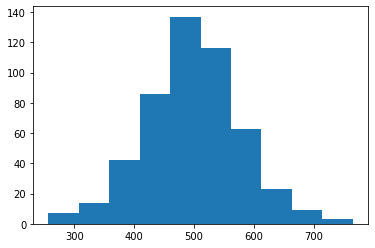

In [84]:
plt.hist(df_customer['Yearly Amount Spent'])

In [85]:
def money_spent_categorizer(money):
    if money < 460:
        return 0 #soft buyer
    elif money >=460 and money <=540:
        return 1 #medium buyer
    else:
        return 2 #heavy buyer
    
df_customer['buyer_type'] = df_customer.apply(lambda x: money_spent_categorizer(x['Yearly Amount Spent']), axis=1)

In [86]:
train = df_customer.drop(columns=['Yearly Amount Spent', 'buyer_type'])
test = df_customer['buyer_type']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)

In [87]:
#instance
svc_1 = SVC()

#train
svc_1.fit(X_train, y_train)

#train preds
preds_train = svc_1.predict(X_train)

#metrics classifications in train
print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train, y_train))
print()
print('F1 SCORE:\n', f1_score(preds_train, y_train, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train, y_train))

CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[117   5   0]
 [  4 150   5]
 [  0   8 111]]

F1 SCORE:
 0.945

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       122
           1       0.92      0.94      0.93       159
           2       0.96      0.93      0.94       119

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.94      0.95       400



C:\Users\alberto.rubiales\miniconda3\envs\Pycharm\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [88]:
#Classification in test
preds_trest = svc_1.predict(X_test)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest, y_test))
print()
print('F1 SCORE:\n', f1_score(preds_trest, y_test, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest, y_test))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[27  1  0]
 [ 0 38  3]
 [ 0  2 29]]

F1 SCORE:
 0.94

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.93      0.93      0.93        41
           2       0.91      0.94      0.92        31

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [149]:
#instance
svc_2 = SVC(kernel='rbf', class_weight='balanced', decision_function_shape='ovo', C=1.2, gamma=0.1, probability=True)

#train
svc_2.fit(X_train, y_train)

#train preds
preds_train = svc_2.predict(X_train)

#metrics classifications in train
print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train, y_train))
print()
print('F1 SCORE:\n', f1_score(preds_train, y_train, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train, y_train))

CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[117   6   0]
 [  4 148   2]
 [  0   9 114]]

F1 SCORE:
 0.9475

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       123
           1       0.91      0.96      0.93       154
           2       0.98      0.93      0.95       123

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [150]:
#Classification in test
preds_trest = svc_2.predict(X_test)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest, y_test))
print()
print('F1 SCORE:\n', f1_score(preds_trest, y_test, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest, y_test))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[27  1  0]
 [ 0 38  1]
 [ 0  2 31]]

F1 SCORE:
 0.96

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.93      0.97      0.95        39
           2       0.97      0.94      0.95        33

    accuracy                           0.96       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



We have improve our **accuracy in 2%.** Nice!  

Our model is not linear, because we use the RBF kernel, so we don't have coefficients. So if we want to know how each feature affect to the decission we need to make and the amount of information that give to us, we need to make some extra calculations that we will learn in another notebook :).  

Finally we will se the probabilitys of each user for each class

In [169]:
X_test_prob = X_test.copy()
X_test_prob.reset_index(drop=True, inplace=True)
probs = pd.DataFrame(svc_2.predict_proba(X_test), columns=[0,1,2]).round(2)
X_test_prob.merge(probs, left_index=True, right_index=True)[:20]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,0,1,2
0,36.139662,12.050267,36.959643,3.864861,0.01,0.02,0.98
1,33.025020,12.504220,37.645839,4.051382,0.00,0.10,0.89
2,32.070546,11.733106,37.534291,4.671275,0.01,0.71,0.28
3,32.189845,11.386776,38.197483,4.808320,0.01,0.89,0.10
4,31.885406,11.281931,37.385318,2.877225,1.00,0.00,0.00
5,34.394327,12.807752,38.551030,1.810080,0.76,0.20,0.04
6,32.903454,10.542645,35.533864,3.091827,1.00,0.00,0.00
7,33.236266,10.972554,34.574028,2.931620,1.00,0.00,0.00
8,33.924625,11.911416,38.274702,2.910038,0.04,0.95,0.01
9,33.200616,11.965980,36.831536,3.549036,0.00,1.00,0.00
